In [8]:
import pandas as pd
import numpy as np
from statsmodels.stats import proportion as pr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.stats.api as sms

warnings.filterwarnings ("ignore")
pd.set_option ('display.float_format', lambda x: '%.6f' % x)
pd.set_option ('display.width', None)
pd.set_option ('display.max_columns', None)

## Maximum Cost Bidding vs Average Cost Bidding


In [25]:
#ControlGroup (Maximum Bidding)
control_df = pd.read_excel ("ab_testing1.xlsx" , sheet_name="Control Group")

In [26]:
# Test Group (Average Bidding)
test_df = pd.read_excel ("ab_testing1.xlsx",sheet_name="Test Group")

In [27]:
control_df.shape

(40, 4)

In [28]:
control_df.head()

,Impression,Click,Purchase,Earning
0,82529,6090,665,2311
1,98050,3383,315,1743
2,82696,4168,458,1798
3,109914,4911,487,1696
4,108458,5988,441,1544


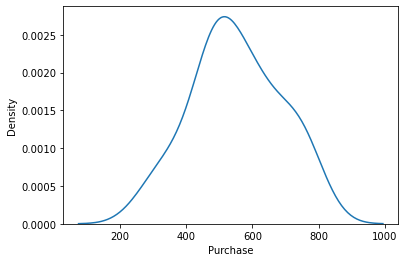

In [29]:
sns.distplot (control_df["Purchase"], hist=False)  # normal distribution
plt.show ();

In [30]:
test_df.shape

(40, 4)

In [21]:
test_df.head()

,Impression,Click,Purchase,Earning
0,120104,3217,702,1940
1,134776,3635,834,2929
2,107807,3057,423,2526
3,116445,4650,429,2281
4,145083,5201,750,2782


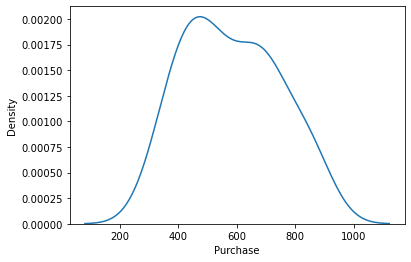

In [23]:
sns.distplot (test_df["Purchase"], hist=False)  # Normal distribution
plt.show ();

In [32]:
control_df["Earning_Per_Click"] = control_df["Earning"] / control_df["Click"]
control_df.head()

,Impression,Click,Purchase,Earning,Earning_Per_Click
0,82529,6090,665,2311,0.379475
1,98050,3383,315,1743,0.515223
2,82696,4168,458,1798,0.431382
3,109914,4911,487,1696,0.345347
4,108458,5988,441,1544,0.257849


In [33]:
test_df["Earning_Per_Click"] = test_df["Earning"] / test_df["Click"]
test_df.head()

,Impression,Click,Purchase,Earning,Earning_Per_Click
0,120104,3217,702,1940,0.603046
1,134776,3635,834,2929,0.805777
2,107807,3057,423,2526,0.826300
3,116445,4650,429,2281,0.490538
4,145083,5201,750,2782,0.534897


In [36]:
# Test ve Control Grubu için Earning/Click Değişkeninin Türetilmesi
groups = [control_df, test_df]

for group in groups:
    group["Earning_Per_Click"] = group["Earning"] / group["Click"]

control_df.head ()
test_df.head ()

,Impression,Click,Purchase,Earning,Earning_Per_Click
0,120104,3217,702,1940,0.603046
1,134776,3635,834,2929,0.805777
2,107807,3057,423,2526,0.826300
3,116445,4650,429,2281,0.490538
4,145083,5201,750,2782,0.534897


In [37]:
control_df["Purchase"].describe ()

count    40.000000
mean    550.900000
std     134.110517
min     267.000000
25%     470.500000
50%     531.500000
75%     638.000000
max     802.000000
Name: Purchase, dtype: float64

In [38]:
test_df["Purchase"].describe ()

count    40.000000
mean    582.050000
std     161.175164
min     312.000000
25%     444.750000
50%     551.000000
75%     699.750000
max     890.000000
Name: Purchase, dtype: float64

In [39]:
# İki Grubun Purchase ve Earning Betimsel İstatistiklerinin Karşılaştırılması
desc_compare_df = pd.DataFrame ({"Control_Purchase": control_df["Purchase"].describe (),
                                 "Test_Purchase": test_df["Purchase"].describe ()})

In [40]:
desc_compare_df  # Test grubunun ortalaması ve medyanı yüksek olmasına rağmen, standart sapması da yüksek olduğundan anlamlı bir farklılık olup olmadığını kontrol edelim.

,Control_Purchase,Test_Purchase
count,40.000000,40.000000
mean,550.900000,582.050000
std,134.110517,161.175164
min,267.000000,312.000000
25%,470.500000,444.750000
50%,531.500000,551.000000
75%,638.000000,699.750000
max,802.000000,890.000000


In [41]:
# Güven Aralığı Değerlendirmesi
sms.DescrStatsW (control_df["Purchase"]).tconfint_mean ()
# (508.0041754264924, 593.7839421139709) Kontrol grubu %95 güven aralığı değerleri

(508.00937604959614, 593.7906239504039)

In [42]:
sms.DescrStatsW (test_df["Purchase"]).tconfint_mean ()
# (530.5670226990062, 633.6451705979289) Test grubu %95 güven aralığı değerleri

(530.5036822081174, 633.5963177918825)

In [43]:
earning_df = pd.DataFrame ({"Control_Earning": control_df["Earning"].describe (),
                            "Test_Earning": test_df["Earning"].describe ()})
earning_df

,Control_Earning,Test_Earning
count,40.000000,40.000000
mean,1908.575000,2514.925000
std,302.868329,282.707912
min,1254.000000,1940.000000
25%,1685.750000,2280.250000
50%,1975.000000,2544.500000
75%,2120.000000,2761.750000
max,2497.000000,3171.000000


In [44]:
control_df["Purchase"].head()

0    665
1    315
2    458
3    487
4    441
Name: Purchase, dtype: int64

In [45]:
# Güven Aralığı Değerlendirmesi
sms.DescrStatsW (control_df["Earning"]).tconfint_mean ()

(1811.7130094795095, 2005.4369905204906)

In [46]:
sms.DescrStatsW (test_df["Earning"]).tconfint_mean ()

(2424.510623786845, 2605.3393762131554)

In [47]:
from scipy.stats import shapiro

In [48]:
p_value_threshold = 0.05

In [49]:
control_df.columns

Index(['Impression', 'Click', 'Purchase', 'Earning', 'Earning_Per_Click'], dtype='object')

In [50]:
shapiro (control_df['Impression'])

ShapiroResult(statistic=0.969672679901123, pvalue=0.35140591859817505)

In [51]:
ttest, p_value = shapiro (control_df['Impression'])

In [52]:
ttest

0.969672679901123

In [53]:
p_value

0.35140591859817505

In [54]:
if p_value >= p_value_threshold:
    print ("Normal")
else:
    print ("Abnormal")

Normal


In [55]:
distribution_list = ("Normal")

In [56]:
pd.DataFrame(index=['Impression'], data={"P_Value": p_value, "Distribution": distribution_list})

,P_Value,Distribution
Impression,0.351406,Normal


In [57]:
# Automation

In [58]:
def normality_func(dataframe):
    from scipy.stats import shapiro
    p_value_threshold = 0.05
    p_value_list = []
    distribution_list = []
    normal_list = []
    abnormal_list = []
    for col in dataframe.columns:
        ttest, p_value = shapiro (dataframe[col])
        p_value_list.append (p_value)
        if p_value >= p_value_threshold:
            distribution_list.append ("Normal")
            normal_list.append (col)
        else:
            distribution_list.append ("Abnormal")
            abnormal_list.append (col)

    new_df = pd.DataFrame (index=dataframe.columns, data={"P_Value": p_value_list, "Distribution": distribution_list})
    return new_df, normal_list, abnormal_list



In [60]:
control_normality, control_normal_list, control_abnormal_list = normality_func (control_df)
test_normality, test_normal_list, test_abnormal_list = normality_func (test_df)

In [61]:
control_normality

,P_Value,Distribution
Impression,0.351406,Normal
Click,0.845837,Normal
Purchase,0.592874,Normal
Earning,0.531293,Normal
Earning_Per_Click,0.012833,Abnormal


In [62]:
control_normal_list

['Impression', 'Click', 'Purchase', 'Earning']

In [63]:
control_abnormal_list

['Earning_Per_Click']

In [65]:
from scipy.stats import levene

ttest_lev, p_value_lev = levene (control_df["Purchase"], test_df["Purchase"])
print ("ttest istatistiği: {}\np_value: {}".format (ttest_lev, p_value_lev))

ttest istatistiği: 2.640298470042385
p_value: 0.10821824555495507


In [66]:
def variance_homogeneity(dataframe_control, dataframe_test):
    from scipy.stats import levene
    p_value_threshold = 0.05
    p_value_list = []
    variance_list = []
    column_list = list (zip (sorted (dataframe_control.columns), sorted (dataframe_test.columns)))
    features = []
    homogeneus_list = []
    not_homogeneus_list = []
    for col in column_list:
        ttest_lev, p_value_lev = levene (dataframe_control[col[0]], dataframe_test[col[1]])
        if (col[0] == col[1]) and (p_value_lev >= p_value_threshold):
            p_value_list.append (p_value_lev)
            variance_list.append ("No Difference")
            homogeneus_list.append (col[0])
            features.append (col[0])
        elif (col[0] == col[1]) and (p_value_lev < p_value_threshold):
            p_value_list.append (p_value_lev)
            variance_list.append ("Different")
            not_homogeneus_list.append (col[0])
            features.append (col[0])

    new_df = pd.DataFrame (index=features, data={"P_Value": p_value_list, "Homogeneity_of_Variance": variance_list})

    return new_df, homogeneus_list, not_homogeneus_list


variance_df, homogeneus, not_homogeneus = variance_homogeneity (control_df, test_df)

In [67]:
variance_df

,P_Value,Homogeneity_of_Variance
Click,0.014086,Different
Earning,0.554407,No Difference
Earning_Per_Click,0.502666,No Difference
Impression,0.446118,No Difference
Purchase,0.108218,No Difference


In [68]:
homogeneus

['Earning', 'Earning_Per_Click', 'Impression', 'Purchase']

In [69]:
not_homogeneus

['Click']

In [70]:

from scipy.stats import ttest_ind, mannwhitneyu

# Normal dağılan parametrik değişkenler için ttest, normal dağılmayan nonparametrik değişkenler için mannwhitneyu testini kullanıyoruz.
feat_dict = {}
for feat in control_normal_list:
    if feat in homogeneus:
        ttest_value, p_value = ttest_ind (control_df[feat], test_df[feat], equal_var=True)
        feat_dict[feat] = p_value
    elif feat not in homogeneus:
        ttest_value, p_value = ttest_ind (control_df[feat], test_df[feat], equal_var=False)
        feat_dict[feat] = p_value

for feat in control_abnormal_list:
    ttest_value, p_value = mannwhitneyu (control_df[feat], test_df[feat])
    feat_dict[feat] = p_value

ttest_df = pd.DataFrame (data=feat_dict.values (), index=feat_dict.keys (), columns=["Ttest_P_Value"])

In [71]:
control_df["Impression"].mean()

101711.45

In [72]:
test_df["Impression"].mean()

120512.425

In [73]:
control_df["Click"].mean()

5100.625

In [74]:
test_df["Click"].mean()

3967.55

In [75]:
(5100.625 - 3967.55) / 5100.625

0.22214434505575292

In [76]:
control_df["Purchase"].mean()

550.9

In [77]:
test_df["Purchase"].mean()

582.05

In [78]:
control_df["Earning"].mean()

1908.575

In [79]:
test_df["Earning"].mean()

2514.925

In [80]:
ttest_df

,Ttest_P_Value
Impression,0.000050
Click,0.000035
Purchase,0.350322
Earning,0.000000
Earning_Per_Click,0.000000


In [81]:
for col in control_df.columns:
    ttest_df.loc[ttest_df.index == col, "Maximum Bidding Mean"] = control_df[col].mean ()

In [82]:
ttest_df

,Ttest_P_Value,Maximum Bidding Mean
Impression,0.000050,101711.450000
Click,0.000035,5100.625000
Purchase,0.350322,550.900000
Earning,0.000000,1908.575000
Earning_Per_Click,0.000000,0.408358


In [83]:
for col in test_df.columns:
    ttest_df.loc[ttest_df.index == col, "Average Bidding Mean"] = test_df[col].mean ()

In [84]:
ttest_df

,Ttest_P_Value,Maximum Bidding Mean,Average Bidding Mean
Impression,0.000050,101711.450000,120512.425000
Click,0.000035,5100.625000,3967.550000
Purchase,0.350322,550.900000,582.050000
Earning,0.000000,1908.575000,2514.925000
Earning_Per_Click,0.000000,0.408358,0.668312


In [85]:
threshold = 0.05           # p_value değeri
ttest_df.loc[ttest_df["Ttest_P_Value"] < threshold, "H0_Hypothesis"] = "Rejected"
ttest_df.loc[ttest_df["Ttest_P_Value"] >= threshold, "H0_Hypothesis"] = "Not Rejected"

# Her bir değişken için iki bidding tipinin ortalamalarını karşılaştırıyoruz.
ttest_df["Winner"] = ttest_df.apply (
    lambda x: "Maximum Bidding" if (x["Maximum Bidding Mean"] >= x["Average Bidding Mean"]) & (
                x["H0_Hypothesis"] == "Rejected") else
    "Average Bidding" if (x["Maximum Bidding Mean"] < x["Average Bidding Mean"]) & (
                x["H0_Hypothesis"] == "Rejected") else
    "No Difference", axis=1)

ttest_df

,Ttest_P_Value,Maximum Bidding Mean,Average Bidding Mean,H0_Hypothesis,Winner
Impression,0.000050,101711.450000,120512.425000,Rejected,Average Bidding
Click,0.000035,5100.625000,3967.550000,Rejected,Maximum Bidding
Purchase,0.350322,550.900000,582.050000,Not Rejected,No Difference
Earning,0.000000,1908.575000,2514.925000,Rejected,Average Bidding
Earning_Per_Click,0.000000,0.408358,0.668312,Rejected,Average Bidding


In [86]:
control_df["Purchase"].shape[0]  # Gözlem sayısı 40, n1>30 varsayımı sağlanıyor.
test_df["Purchase"].shape[0]  # Gözlem sayısı 40, n2>30 varsayımı sağlanıyor.

40

In [89]:
from statsmodels.stats.proportion import proportions_ztest

purchase_sum = np.array ([control_df["Purchase"].sum (), test_df["Purchase"].sum ()])
click_sum = np.array ([control_df["Click"].sum (), test_df["Click"].sum ()])
impression_sum = np.array ([control_df["Impression"].sum (), test_df["Impression"].sum ()])

In [90]:
# purchase / impression
ttest_z_purc_imp, p_purc_imp = proportions_ztest (purchase_sum, impression_sum)

# purchase / click
ttest_z_purc_click, p_purc_click = proportions_ztest (purchase_sum, click_sum)

# click / impression
ttest_z_click_imp, p_click_imp = proportions_ztest (click_sum, impression_sum)

prop_df = pd.DataFrame(index=["Purchase/Impression", "Purchase/Click", "Click/Impression"], columns=["Proportions_P_Value"], data=[p_purc_imp, p_purc_click, p_click_imp])

prop_df.loc[prop_df.index == "Purchase/Impression", "Maximum Bidding"] = control_df["Purchase"].sum() / control_df["Impression"] .sum()
prop_df.loc[prop_df.index == "Purchase/Impression", "Average Bidding"] = test_df["Purchase"].sum() / test_df["Impression"] .sum()

prop_df.loc[prop_df.index == "Purchase/Click", "Maximum Bidding"] = control_df["Purchase"].sum() / control_df["Click"] .sum()
prop_df.loc[prop_df.index == "Purchase/Click", "Average Bidding"] = test_df["Purchase"].sum() / test_df["Click"] .sum()

prop_df.loc[prop_df.index == "Click/Impression", "Maximum Bidding"] = control_df["Click"].sum() / control_df["Impression"] .sum()
prop_df.loc[prop_df.index == "Click/Impression", "Average Bidding"] = test_df["Click"].sum() / test_df["Impression"] .sum()

prop_df["H0_Hypothesis"] = prop_df.apply(lambda x: "Rejected" if x["Proportions_P_Value"]<threshold else "Not Rejected", axis=1)

prop_df["Winner"] = prop_df.apply(lambda x: "Maximum Bidding" if x["Maximum Bidding"] >= x["Average Bidding"] else "Average Bidding", axis=1)

In [91]:
prop_df

,Proportions_P_Value,Maximum Bidding,Average Bidding,H0_Hypothesis,Winner
Purchase/Impression,0.000000,0.005416,0.004830,Rejected,Maximum Bidding
Purchase/Click,0.000000,0.108006,0.146703,Rejected,Average Bidding
Click/Impression,0.000000,0.050148,0.032922,Rejected,Maximum Bidding
